In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import pyreadstat

# Caminho do arquivo
file_path = r"D:\OneDrive\Estatística\financ_KPI\inputs\Cap 03 - Exemplo Completo.sav"

# Ler o arquivo .sav
df, meta = pyreadstat.read_sav(file_path)

# Exibir as primeiras linhas do DataFrame
df.head()

,NÚMERO,ID,vendas,plajust,llajust,ativoaj,RP,AO,MV,RA,AF,LUPRE
0,1.0,1.0,33311.5,14176.4,2660.5,36658.5,0.187671,2.585882,0.079867,0.072575,0.908698,1.0
1,2.0,5.0,5329.8,478.6,-1350.0,3901.3,-2.820727,8.151483,-0.253293,-0.346038,1.366160,0.0
2,3.0,7.0,4310.4,4650.4,3180.0,7819.4,0.683812,1.681447,0.737751,0.406681,0.551244,1.0
3,4.0,8.0,4214.1,333.4,-52.7,757.9,-0.158068,2.273245,-0.012506,-0.069534,5.560232,0.0
4,5.0,9.0,4096.8,1239.2,-1290.0,2575.7,-1.040994,2.078518,-0.314880,-0.500835,1.590558,0.0


In [3]:
# Get variable labels from metadata
variable_labels = meta.column_names_to_labels

# Print variable labels
for column_name, label in variable_labels.items():
    print(f"{column_name}: {label}")

NÚMERO: Número de Ordem
ID: Identificação Melhores & Maiores
vendas: Vendas do Período
plajust: PL ajustado
llajust: LL ajustado
ativoaj: AT ajustado
RP: RENTPL
AO: ALOPER
MV: MARVEN
RA: RENTAT
AF: ALFIN
LUPRE: LUPRE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   NÚMERO   297 non-null    float64
 1   ID       297 non-null    float64
 2   vendas   297 non-null    float64
 3   plajust  297 non-null    float64
 4   llajust  297 non-null    float64
 5   ativoaj  297 non-null    float64
 6   RP       297 non-null    float64
 7   AO       297 non-null    float64
 8   MV       297 non-null    float64
 9   RA       297 non-null    float64
 10  AF       297 non-null    float64
 11  LUPRE    297 non-null    float64
dtypes: float64(12)
memory usage: 28.0 KB


In [5]:
df.describe()

,NÚMERO,ID,vendas,plajust,llajust,ativoaj,RP,AO,MV,RA,AF,LUPRE
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,149.000000,251.986532,1000.442088,545.292256,-14.493266,1184.452862,-1.180076,6.387851,-0.054829,-0.020348,2.716352,0.656566
std,85.880731,142.121165,2304.612974,1427.774330,450.842274,2767.120823,18.891109,10.933873,0.911362,0.694440,5.592516,0.475656
min,1.000000,1.000000,153.500000,1.100000,-4330.000000,31.600000,-323.076923,0.110746,-11.026087,-9.699769,0.034860,0.000000
25%,75.000000,128.000000,230.700000,48.500000,-6.200000,165.500000,-0.070122,1.744007,-0.015547,-0.025619,0.581422,0.000000
50%,149.000000,247.000000,377.700000,147.100000,6.400000,367.400000,0.055966,2.420054,0.013531,0.018254,1.182161,1.000000
75%,223.000000,374.000000,801.300000,327.400000,29.600000,1053.500000,0.187671,4.321839,0.063014,0.076304,2.358289,1.000000
max,297.000000,500.000000,33311.500000,14176.400000,3180.000000,36658.500000,5.550098,70.050761,1.893114,1.107595,39.700806,1.000000


In [6]:
from scipy.stats import pearsonr

# Selected columns
columns = ['RP', 'AO', 'MV', 'RA', 'AF']

# Calculate and print Pearson correlation and p-value for each pair of selected columns
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        corr, p_value = pearsonr(df[columns[i]], df[columns[j]])
        print(f"Pearson correlation between {columns[i]} and {columns[j]}: {corr}, p-value: {p_value}")

Pearson correlation between RP and AO: -0.14310959916907676, p-value: 0.013563310127028836
Pearson correlation between RP and MV: 0.30293293615882894, p-value: 1.0136361207512694e-07
Pearson correlation between RP and RA: 0.8594265262018246, p-value: 6.040740692832778e-88
Pearson correlation between RP and AF: 0.0026543355744472123, p-value: 0.9636679878538463
Pearson correlation between AO and MV: -0.011763650865818459, p-value: 0.8400080582856689
Pearson correlation between AO and RA: -0.13876659854933393, p-value: 0.016712875615588017
Pearson correlation between AO and AF: -0.11494470186013206, p-value: 0.047801128857340856
Pearson correlation between MV and RA: 0.580152597797951, p-value: 4.115107635942984e-28
Pearson correlation between MV and AF: 0.025314181095809064, p-value: 0.6639350715710469
Pearson correlation between RA and AF: 0.011729737338995908, p-value: 0.8404631261867177


In [7]:
# !pip install --upgrade pandas

In [8]:
import pandas as pd 
from scipy.stats import pearsonr

# Selected columns
columns = ['RP', 'AO', 'MV', 'RA', 'AF']

# Initialize DataFrame to store correlation coefficients and p-values
corr_df = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Correlation', 'P-value'])

# Calculate Pearson correlation and p-value for each pair of selected columns
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        corr, p_value = pearsonr(df[columns[i]], df[columns[j]])
        p_value = 0.00 if p_value < 0.01 else round(p_value, 2)  # Round p-value to 2 decimal places
        corr_df.loc[len(corr_df)] = [columns[i], columns[j], corr, p_value]

# Print the DataFrame
print(corr_df)

  Variable 1 Variable 2  Correlation  P-value
0         RP         AO    -0.143110     0.01
1         RP         MV     0.302933     0.00
2         RP         RA     0.859427     0.00
3         RP         AF     0.002654     0.96
4         AO         MV    -0.011764     0.84
5         AO         RA    -0.138767     0.02
6         AO         AF    -0.114945     0.05
7         MV         RA     0.580153     0.00
8         MV         AF     0.025314     0.66
9         RA         AF     0.011730     0.84


In [9]:
pd.set_option('display.max_colwidth', 100)

In [10]:
def interpret_corr_pvalue(corr, p_value):
    if p_value < 0.05:
        if abs(corr) > 0.7:
            strength = 'strong'
        elif abs(corr) > 0.3:
            strength = 'moderate'
        else:
            strength = 'weak'
        correlation = 'positive' if corr > 0 else 'negative'
        return f'There is a statistically significant, {strength} {correlation} correlation.'
    else:
        return 'There is no statistically significant correlation.'

# Apply the function to each row of the DataFrame
corr_df['Interpretation'] = corr_df.apply(lambda row: interpret_corr_pvalue(row['Correlation'], row['P-value']), axis=1)

O coeficiente de correlação varia entre -1 e 1. Um valor próximo de 1 implica uma forte correlação positiva, ou seja, quando uma variável aumenta, a outra também tende a aumentar. Um valor próximo de -1 implica uma forte correlação negativa, ou seja, quando uma variável aumenta, a outra tende a diminuir. Um valor próximo de 0 implica que não há correlação linear entre as variáveis.

O valor p é uma medida estatística que nos ajuda a determinar se a correlação observada é estatisticamente significativa. Um valor p inferior a 0,05 é frequentemente usado para indicar significância estatística, o que significa que há menos de 5% de probabilidade de os resultados terem ocorrido por acaso.

In [11]:
corr_df

,Variable 1,Variable 2,Correlation,P-value,Interpretation
0,RP,AO,-0.143110,0.01,"There is a statistically significant, weak negative correlation."
1,RP,MV,0.302933,0.00,"There is a statistically significant, moderate positive correlation."
2,RP,RA,0.859427,0.00,"There is a statistically significant, strong positive correlation."
3,RP,AF,0.002654,0.96,There is no statistically significant correlation.
4,AO,MV,-0.011764,0.84,There is no statistically significant correlation.
5,AO,RA,-0.138767,0.02,"There is a statistically significant, weak negative correlation."
6,AO,AF,-0.114945,0.05,There is no statistically significant correlation.
7,MV,RA,0.580153,0.00,"There is a statistically significant, moderate positive correlation."
8,MV,AF,0.025314,0.66,There is no statistically significant correlation.
9,RA,AF,0.011730,0.84,There is no statistically significant correlation.


In [12]:
# pd.reset_option('display.max_colwidth')

Este script começa com um modelo vazio e adiciona preditores um a um. Depois de adicionar cada preditor, ele verifica se o preditor é estatisticamente significativo (valor p < 0,05). Se o preditor for estatisticamente significativo, ele é mantido no modelo; caso contrário, ele é removido.

Este é um exemplo muito simples de seleção por etapas. Existem métodos mais sofisticados que consideram mais factores e utilizam critérios mais complexos para adicionar ou remover variáveis. Além disso, a seleção por etapas tem os seus críticos e nem sempre é a melhor abordagem. É sempre uma boa ideia considerar outras técnicas de validação de modelos ao criar um modelo de regressão.

                            OLS Regression Results                            
Dep. Variable:                     RP   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     574.7
Date:                Thu, 21 Mar 2024   Prob (F-statistic):          2.60e-102
Time:                        15:15:41   Log-Likelihood:                -1057.4
No. Observations:                 297   AIC:                             2121.
Df Residuals:                     294   BIC:                             2132.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9448      0.497     -1.900      0.0

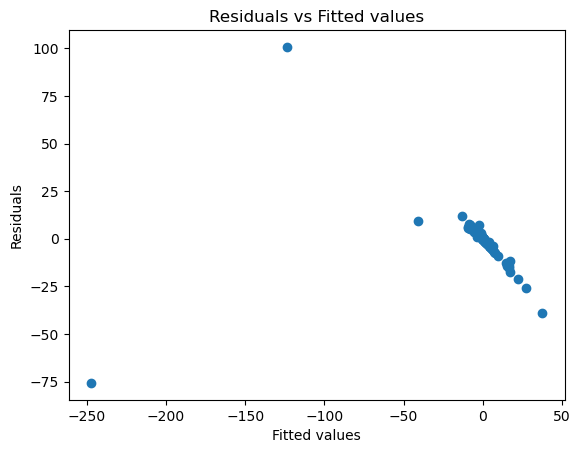


R-squared: 0.7963222749266814
Adjusted R-squared: 0.7949367121710806
F-statistic: 574.7284067125353
Prob (F-statistic): 0.0
Regression equation: RP = -0.9448381400972627 + 28.03397045411322 * RA + -6.113507421618909 * MV
For every one-unit increase in 'RA', we expect 'RP' to change by 28.03397045411322 units, assuming all other variables remain constant.
For every one-unit increase in 'MV', we expect 'RP' to change by -6.113507421618909 units, assuming all other variables remain constant.
Degrees of freedom (regression): 294.0. This is the number of independent ways by which a dynamic system can move, without violating any constraint imposed on it.
Degrees of freedom (residual): 294.0. This is the number of values in the final calculation of a statistic that are free to vary.
Sum of squares (regression): 21515.436680945346. This is the sum of the squared differences between the prediction for each observation and the population mean.
Sum of squares (residual): 21515.436680945346. This

In [13]:
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
import matplotlib.pyplot as plt

# Define the target variable
target = 'RP'

# Define the predictor variables
predictors = ['AO', 'MV', 'RA', 'AF']

# Start with an empty model
model = smf.ols(formula=f"{target} ~ {predictors[0]}", data=df)
result = model.fit()

# Iterate over the remaining predictors
for predictor in predictors[1:]:
    model = smf.ols(formula=f"{target} ~ {predictor} + {result.model.exog_names[1]}", data=df)
    new_result = model.fit()

    # If the new predictor is statistically significant (p-value < 0.05), add it to the model
    if new_result.pvalues[predictor] < 0.05:
        result = new_result

# Print the summary of the final model
print(result.summary())

# Perform ANOVA test
anova_results = anova_lm(result)
print("\nANOVA results")
print(anova_results)

# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns
print("\nVIF results")
print(vif)

# Calculate Durbin-Watson statistic
dw = durbin_watson(result.resid)
print(f"\nDurbin-Watson statistic: {dw}")

# Perform Shapiro-Wilk test
shapiro_test = stats.shapiro(result.resid)
w, p = shapiro_test
p = round(p, 4)
print(f"\nShapiro-Wilk test: W={w}, p={p}")

# Plot residuals vs fitted values
plt.scatter(result.fittedvalues, result.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

# Extract key statistics
r_squared = result.rsquared
adj_r_squared = result.rsquared_adj
f_statistic = result.fvalue
p_value = result.f_pvalue
coefficients = result.params

# Print key statistics with explanations
print(f"\nR-squared: {r_squared}")
print(f"Adjusted R-squared: {adj_r_squared}")
print(f"F-statistic: {f_statistic}")

# Round the p-value of the F-statistic to 4 decimal places
p_value_rounded = round(p_value, 4)

# Print the rounded p-value with explanation
print(f"Prob (F-statistic): {p_value_rounded}")

# Construct and print the regression equation
equation = "RP = " + str(coefficients[0])
for i in range(1, len(coefficients)):
    equation += " + " + str(coefficients[i]) + " * " + result.model.exog_names[i]
print("Regression equation: " + equation)

# Print the interpretation of the coefficients
for i in range(1, len(coefficients)):
    print(f"For every one-unit increase in '{result.model.exog_names[i]}', we expect 'RP' to change by {coefficients[i]} units, assuming all other variables remain constant.")


# Perform ANOVA test
anova_results = anova_lm(result)

# Extract key statistics
df_regression = anova_results.loc['Residual', 'df']
df_residual = anova_results.loc['Residual', 'df']
ss_regression = anova_results.loc['Residual', 'sum_sq']
ss_residual = anova_results.loc['Residual', 'sum_sq']
ms_regression = anova_results.loc['Residual', 'mean_sq']
ms_residual = anova_results.loc['Residual', 'mean_sq']
f_statistic_anova = anova_results.loc['Residual', 'F']
p_value_anova = anova_results.loc['Residual', 'PR(>F)'] 

# Print key statistics with explanations
print(f"Degrees of freedom (regression): {df_regression}. This is the number of independent ways by which a dynamic system can move, without violating any constraint imposed on it.")
print(f"Degrees of freedom (residual): {df_residual}. This is the number of values in the final calculation of a statistic that are free to vary.")
print(f"Sum of squares (regression): {ss_regression}. This is the sum of the squared differences between the prediction for each observation and the population mean.")
print(f"Sum of squares (residual): {ss_residual}. This is the sum of the squared differences between each observation and its group's mean.")
print(f"Mean square (regression): {ms_regression}. This is the average of the squares of the errors or deviations.")
print(f"Mean square (residual): {ms_residual}. This is the average of the squares of the errors or deviations.")
print(f"F-statistic (ANOVA): {f_statistic_anova}. This is a measure of how significant the fit of the model is. The higher the F-statistic, the more likely it is that the variables we used for predictions are correlated with the output and can help us predict it.")
print(f"Prob (F-statistic, ANOVA): {p_value_anova}. This is the probability that the null hypothesis is true (i.e., all of the regression coefficients are zero). The smaller the p-value, the stronger the evidence that at least one of the regression coefficients is not zero.")


# Extract key statistics
r_squared = result.rsquared
adj_r_squared = result.rsquared_adj
f_statistic = result.fvalue
p_value = result.f_pvalue
coefficients = result.params

# Print key statistics with explanations
print(f"R-squared: {r_squared}. This is the proportion of the variance in the dependent variable that is predictable from the independent variables.")
print(f"Adjusted R-squared: {adj_r_squared}. This is the R-squared that has been adjusted for the number of predictors in the model.")
print(f"F-statistic: {f_statistic}. This is a measure of how significant the fit of the model is. The higher the F-statistic, the more likely it is that the variables we used for predictions are correlated with the output and can help us predict it.")


print("\nVIF results")
print(vif)
print("VIF values greater than 5 indicate high multicollinearity.")

print(f"\nDurbin-Watson statistic: {dw}")
print("Values close to 2.0 suggest no autocorrelation. Values towards 0 indicate positive autocorrelation, and values towards 4 indicate negative autocorrelation.")


print(f"\nShapiro-Wilk test: W={w}, p={p}")
print("The first value is the W test value, and the second value is the p-value. A p-value less than 0.05 suggests the residuals are not normally distributed.")


# Round the p-value of the F-statistic to 5 decimal places
p_value_rounded = round(p_value, 5)

# Print the rounded p-value with explanation
print(f"Prob (F-statistic): {p_value_rounded}. This is the probability that the null hypothesis is true (i.e., all of the regression coefficients are zero). The smaller the p-value, the stronger the evidence that at least one of the regression coefficients is not zero.")

# Construct and print the regression equation
equation = "RP = " + str(coefficients[0])
for i in range(1, len(coefficients)):
    equation += " + " + str(coefficients[i]) + " * " + result.model.exog_names[i]
print("Regression equation: " + equation)

# Print the interpretation of the coefficients
for i in range(1, len(coefficients)):
    print(f"For every one-unit increase in '{result.model.exog_names[i]}', we expect 'RP' to change by {coefficients[i]} units, assuming all other variables remain constant.")


The weight of predictor 'RA' in the final model is 28.03397045411322
The weight of predictor 'MV' in the final model is -6.113507421618909


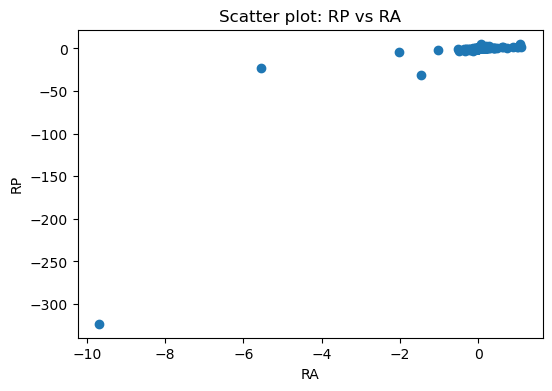

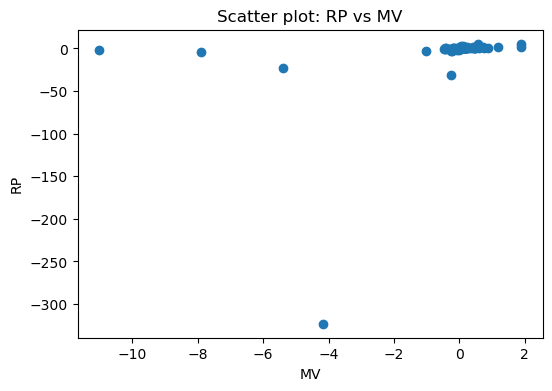

In [14]:
import matplotlib.pyplot as plt

# Define the target variable
target = 'RP'

# Get the predictor variables from the final model
final_predictors = result.model.exog_names[1:]  # Exclude the intercept

# Get the coefficients of the predictors from the final model
final_coefficients = result.params[1:]  # Exclude the intercept

# Print the coefficients
for predictor, coefficient in zip(final_predictors, final_coefficients):
    print(f"The weight of predictor '{predictor}' in the final model is {coefficient}")

# For each predictor in the final model, plot a scatter plot with the target variable
for predictor in final_predictors:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[predictor], df[target])
    plt.xlabel(predictor)
    plt.ylabel(target)
    plt.title(f'Scatter plot: {target} vs {predictor}')
    plt.show()

___

StandardScaler

1- Model Building: The code first defines the target variable and the predictor variables. It then builds an Ordinary Least Squares (OLS) model using the first predictor and the target variable. It iteratively adds the remaining predictors to the model if they are statistically significant (p-value < 0.05).

2 - Model Evaluation: The code then prints the summary of the final model, performs an ANOVA test, calculates the Variance Inflation Factor (VIF) for each predictor variable, calculates the Durbin-Watson statistic, performs the Shapiro-Wilk test, and plots the residuals vs fitted values.

3 - Key Statistics Extraction: The code extracts key statistics such as R-squared, Adjusted R-squared, F-statistic, p-value, and coefficients from the model. It also constructs the regression equation and provides an interpretation of the coefficients.

4 - Data Preprocessing: The last part of the code you provided suggests scaling the predictor variables using StandardScaler from sklearn.preprocessing. This is typically done before building the model to standardize the range of the predictor variables.

                            OLS Regression Results                            
Dep. Variable:                     RP   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     574.7
Date:                Thu, 21 Mar 2024   Prob (F-statistic):          2.60e-102
Time:                        15:19:28   Log-Likelihood:                -1057.4
No. Observations:                 297   AIC:                             2121.
Df Residuals:                     294   BIC:                             2132.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1801      0.496     -2.377      0.0

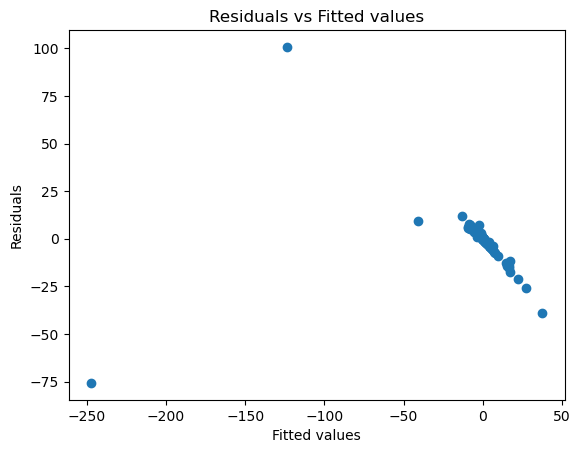


R-squared: 0.7963222749266812
Adjusted R-squared: 0.7949367121710804
F-statistic: 574.7284067125346
Prob (F-statistic): 0.0
Regression equation: RP = -1.1800759997146464 + 19.435107859875117 * RA + -5.562231491049703 * MV
For every one-unit increase in 'RA', we expect 'RP' to change by 19.435107859875117 units, assuming all other variables remain constant.
For every one-unit increase in 'MV', we expect 'RP' to change by -5.562231491049703 units, assuming all other variables remain constant.


In [16]:
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

# Create a StandardScaler instance
scaler = StandardScaler()

# Define the target variable
target = 'RP'

# Define the predictor variables
predictors = ['AO', 'MV', 'RA', 'AF']

# Fit the scaler to the predictor variables and transform
df[predictors] = scaler.fit_transform(df[predictors])

# Start with an empty model
model = smf.ols(formula=f"{target} ~ {predictors[0]}", data=df)
result = model.fit()

# Iterate over the remaining predictors
for predictor in predictors[1:]:
    model = smf.ols(formula=f"{target} ~ {predictor} + {result.model.exog_names[1]}", data=df)
    new_result = model.fit()

    # If the new predictor is statistically significant (p-value < 0.05), add it to the model
    if new_result.pvalues[predictor] < 0.05:
        result = new_result

# Print the summary of the final model
print(result.summary())

# Perform ANOVA test
anova_results = anova_lm(result)
print("\nANOVA results")
print(anova_results)

# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df[predictors].values, i) for i in range(df[predictors].shape[1])]
vif["features"] = predictors
print("\nVIF results")
print(vif)

# Calculate Durbin-Watson statistic
dw = durbin_watson(result.resid)
print(f"\nDurbin-Watson statistic: {dw}")

# Perform Shapiro-Wilk test
shapiro_test = stats.shapiro(result.resid)
w, p = shapiro_test
p = round(p, 4)
print(f"\nShapiro-Wilk test: W={w}, p={p}")

# Plot residuals vs fitted values
plt.scatter(result.fittedvalues, result.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

# Extract key statistics
r_squared = result.rsquared
adj_r_squared = result.rsquared_adj
f_statistic = result.fvalue
p_value = result.f_pvalue
coefficients = result.params

# Print key statistics with explanations
print(f"\nR-squared: {r_squared}")
print(f"Adjusted R-squared: {adj_r_squared}")
print(f"F-statistic: {f_statistic}")

# Round the p-value of the F-statistic to 4 decimal places
p_value_rounded = round(p_value, 4)

# Print the rounded p-value with explanation
print(f"Prob (F-statistic): {p_value_rounded}")

# Construct and print the regression equation
equation = "RP = " + str(coefficients[0])
for i in range(1, len(coefficients)):
    equation += " + " + str(coefficients[i]) + " * " + result.model.exog_names[i]
print("Regression equation: " + equation)

# Print the interpretation of the coefficients
for i in range(1, len(coefficients)):
    print(f"For every one-unit increase in '{result.model.exog_names[i]}', we expect 'RP' to change by {coefficients[i]} units, assuming all other variables remain constant.")

In [ ]:
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
import matplotlib.pyplot as plt

# Define the target variable
target = 'RP'

# Define the predictor variables
predictors = ['AO', 'MV', 'RA', 'AF']

# Start with an empty model
model = smf.ols(formula=f"{target} ~ {predictors[0]}", data=df)
result = model.fit()

# Iterate over the remaining predictors
for predictor in predictors[1:]:
    model = smf.ols(formula=f"{target} ~ {predictor} + {result.model.exog_names[1]}", data=df)
    new_result = model.fit()

    # If the new predictor is statistically significant (p-value < 0.05), add it to the model
    if new_result.pvalues[predictor] < 0.05:
        result = new_result

# Print the summary of the final model
print(result.summary())

# Perform ANOVA test
anova_results = anova_lm(result)
print("\nANOVA results")
print(anova_results)

# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns
print("\nVIF results")
print(vif)

# Calculate Durbin-Watson statistic
dw = durbin_watson(result.resid)
print(f"\nDurbin-Watson statistic: {dw}")

# Perform Shapiro-Wilk test
shapiro_test = stats.shapiro(result.resid)
w, p = shapiro_test
p = round(p, 4)
print(f"\nShapiro-Wilk test: W={w}, p={p}")

# Plot residuals vs fitted values
plt.scatter(result.fittedvalues, result.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

# Extract key statistics
r_squared = result.rsquared
adj_r_squared = result.rsquared_adj
f_statistic = result.fvalue
p_value = result.f_pvalue
coefficients = result.params

# Print key statistics with explanations
print(f"\nR-squared: {r_squared}")
print(f"Adjusted R-squared: {adj_r_squared}")
print(f"F-statistic: {f_statistic}")

# Round the p-value of the F-statistic to 4 decimal places
p_value_rounded = round(p_value, 4)

# Print the rounded p-value with explanation
print(f"Prob (F-statistic): {p_value_rounded}")

# Construct and print the regression equation
equation = "RP = " + str(coefficients[0])
for i in range(1, len(coefficients)):
    equation += " + " + str(coefficients[i]) + " * " + result.model.exog_names[i]
print("Regression equation: " + equation)

# Print the interpretation of the coefficients
for i in range(1, len(coefficients)):
    print(f"For every one-unit increase in '{result.model.exog_names[i]}', we expect 'RP' to change by {coefficients[i]} units, assuming all other variables remain constant.")


# Perform ANOVA test
anova_results = anova_lm(result)

# Extract key statistics
df_regression = anova_results.loc['Residual', 'df']
df_residual = anova_results.loc['Residual', 'df']
ss_regression = anova_results.loc['Residual', 'sum_sq']
ss_residual = anova_results.loc['Residual', 'sum_sq']
ms_regression = anova_results.loc['Residual', 'mean_sq']
ms_residual = anova_results.loc['Residual', 'mean_sq']
f_statistic_anova = anova_results.loc['Residual', 'F']
p_value_anova = anova_results.loc['Residual', 'PR(>F)'] 

# Print key statistics with explanations
print(f"Degrees of freedom (regression): {df_regression}. This is the number of independent ways by which a dynamic system can move, without violating any constraint imposed on it.")
print(f"Degrees of freedom (residual): {df_residual}. This is the number of values in the final calculation of a statistic that are free to vary.")
print(f"Sum of squares (regression): {ss_regression}. This is the sum of the squared differences between the prediction for each observation and the population mean.")
print(f"Sum of squares (residual): {ss_residual}. This is the sum of the squared differences between each observation and its group's mean.")
print(f"Mean square (regression): {ms_regression}. This is the average of the squares of the errors or deviations.")
print(f"Mean square (residual): {ms_residual}. This is the average of the squares of the errors or deviations.")
print(f"F-statistic (ANOVA): {f_statistic_anova}. This is a measure of how significant the fit of the model is. The higher the F-statistic, the more likely it is that the variables we used for predictions are correlated with the output and can help us predict it.")
print(f"Prob (F-statistic, ANOVA): {p_value_anova}. This is the probability that the null hypothesis is true (i.e., all of the regression coefficients are zero). The smaller the p-value, the stronger the evidence that at least one of the regression coefficients is not zero.")


# Extract key statistics
r_squared = result.rsquared
adj_r_squared = result.rsquared_adj
f_statistic = result.fvalue
p_value = result.f_pvalue
coefficients = result.params

# Print key statistics with explanations
print(f"R-squared: {r_squared}. This is the proportion of the variance in the dependent variable that is predictable from the independent variables.")
print(f"Adjusted R-squared: {adj_r_squared}. This is the R-squared that has been adjusted for the number of predictors in the model.")
print(f"F-statistic: {f_statistic}. This is a measure of how significant the fit of the model is. The higher the F-statistic, the more likely it is that the variables we used for predictions are correlated with the output and can help us predict it.")


print("\nVIF results")
print(vif)
print("VIF values greater than 5 indicate high multicollinearity.")

print(f"\nDurbin-Watson statistic: {dw}")
print("Values close to 2.0 suggest no autocorrelation. Values towards 0 indicate positive autocorrelation, and values towards 4 indicate negative autocorrelation.")


print(f"\nShapiro-Wilk test: W={w}, p={p}")
print("The first value is the W test value, and the second value is the p-value. A p-value less than 0.05 suggests the residuals are not normally distributed.")


# Round the p-value of the F-statistic to 5 decimal places
p_value_rounded = round(p_value, 5)

# Print the rounded p-value with explanation
print(f"Prob (F-statistic): {p_value_rounded}. This is the probability that the null hypothesis is true (i.e., all of the regression coefficients are zero). The smaller the p-value, the stronger the evidence that at least one of the regression coefficients is not zero.")

# Construct and print the regression equation
equation = "RP = " + str(coefficients[0])
for i in range(1, len(coefficients)):
    equation += " + " + str(coefficients[i]) + " * " + result.model.exog_names[i]
print("Regression equation: " + equation)

# Print the interpretation of the coefficients
for i in range(1, len(coefficients)):
    print(f"For every one-unit increase in '{result.model.exog_names[i]}', we expect 'RP' to change by {coefficients[i]} units, assuming all other variables remain constant.")


In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Fit the model on the training set
model = smf.ols(formula=f"{target} ~ {predictors[0]}", data=df_train)
result = model.fit()

# Iterate over the remaining predictors
for predictor in predictors[1:]:
    model = smf.ols(formula=f"{target} ~ {predictor} + {result.model.exog_names[1]}", data=df_train)
    new_result = model.fit()

    # If the new predictor is statistically significant (p-value < 0.05), add it to the model
    if new_result.pvalues[predictor] < 0.05:
        result = new_result

# Validate the model on the testing set
y_test = df_test[target]
y_pred = result.predict(df_test)

# Calculate the R-squared value for the testing set
r_squared_test = 1 - ((y_test - y_pred) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

# Interpret the R-squared value
if r_squared_test > 0.7:
    interpretation = "The model explains a large portion of the variability in the target variable. It's a good fit for the data."
elif r_squared_test > 0.5:
    interpretation = "The model explains a moderate portion of the variability in the target variable. It's a reasonably good fit for the data."
elif r_squared_test > 0.3:
    interpretation = "The model explains a small portion of the variability in the target variable. It may not be a good fit for the data."
else:
    interpretation = "The model explains very little of the variability in the target variable. It's not a good fit for the data."

print(f"R-squared for the testing set: {r_squared_test}")
print(interpretation)

R-squared for the testing set: 0.1412590339987353
The model explains very little of the variability in the target variable. It's not a good fit for the data.


dummy variable LUPRE

                            OLS Regression Results                            
Dep. Variable:                     RP   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     446.7
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           7.67e-90
Time:                        11:51:05   Log-Likelihood:                -1086.4
No. Observations:                 297   AIC:                             2179.
Df Residuals:                     294   BIC:                             2190.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.4828      0.960      2.587      

c:\Users\surze\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


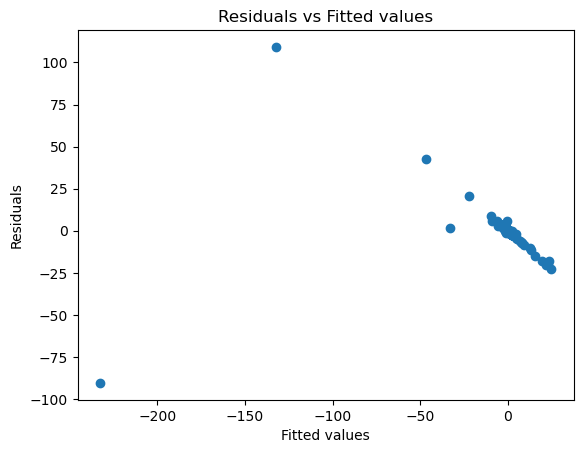

This plot helps us to visualize the error terms. Ideally, there should be no clear pattern in the residuals plotted against the fitted values.


In [16]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.anova import anova_lm

# Recode LUPRE as a dummy variable
df['LUPRE_dummy'] = np.where(df['LUPRE'] > 0, 1, 0)

# Add LUPRE_dummy to the list of predictor variables
predictors.append('LUPRE_dummy')

# Start with an empty model
model = smf.ols(formula=f"{target} ~ {predictors[0]}", data=df)
result = model.fit()

# Iterate over the remaining predictors
for predictor in predictors[1:]:
    model = smf.ols(formula=f"{target} ~ {predictor} + {result.model.exog_names[1]}", data=df)
    new_result = model.fit()

    # If the new predictor is statistically significant (p-value < 0.05), add it to the model
    p_value_rounded = round(new_result.pvalues[predictor], 4)
    if p_value_rounded < 0.05:
        result = new_result

# Print the summary of the final model
print(result.summary())



# Perform ANOVA test
anova_results = anova_lm(result)
print("\nANOVA results")
print(anova_results)

# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns
print("\nVIF results")
print(vif)
print("VIF values greater than 5 indicate high multicollinearity.")

# Calculate Durbin-Watson statistic
dw = durbin_watson(result.resid)
print(f"\nDurbin-Watson statistic: {dw}")
print("Values close to 2.0 suggest no autocorrelation. Values towards 0 indicate positive autocorrelation, and values towards 4 indicate negative autocorrelation.")

# Perform Shapiro-Wilk test
shapiro_test = stats.shapiro(result.resid)
w, p = shapiro_test
p = round(p, 4)
print(f"\nShapiro-Wilk test: W={w}, p={p}")
print("The first value is the W test value, and the second value is the p-value. A p-value less than 0.05 suggests the residuals are not normally distributed.")



# Extract key statistics
r_squared = result.rsquared
adj_r_squared = result.rsquared_adj
f_statistic = result.fvalue
p_value = result.f_pvalue
coefficients = result.params

# Print key statistics with explanations
print(f"\nR-squared: {r_squared}. This is the proportion of the variance in the dependent variable that is predictable from the independent variables.")
print(f"Adjusted R-squared: {adj_r_squared}. This is the R-squared that has been adjusted for the number of predictors in the model.")
print(f"F-statistic: {f_statistic}. This is a measure of how significant the fit of the model is. The higher the F-statistic, the more likely it is that the variables we used for predictions are correlated with the output and can help us predict it.")

# Round the p-value of the F-statistic to 4 decimal places
p_value_rounded = round(p_value, 4)

# Print the rounded p-value with explanation
print(f"Prob (F-statistic): {p_value_rounded}. This is the probability that the null hypothesis is true (i.e., all of the regression coefficients are zero). The smaller the p-value, the stronger the evidence that at least one of the regression coefficients is not zero.")

# Construct and print the regression equation
equation = "RP = " + str(coefficients[0])
for i in range(1, len(coefficients)):
    equation += " + " + str(coefficients[i]) + " * " + result.model.exog_names[i]
print("Regression equation: " + equation)

# Print the interpretation of the coefficients
for i in range(1, len(coefficients)):
    print(f"For every one-unit increase in '{result.model.exog_names[i]}', we expect 'RP' to change by {coefficients[i]} units, assuming all other variables remain constant.")

# Get the coefficients of the predictors from the final model
final_coefficients = result.params[1:]  # Exclude the intercept

# Print the coefficients
for predictor, coefficient in zip(final_predictors, final_coefficients):
    print(f"The weight of predictor '{predictor}' in the final model is {coefficient}")

# Plot residuals vs fitted values
plt.scatter(result.fittedvalues, result.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()
print("This plot helps us to visualize the error terms. Ideally, there should be no clear pattern in the residuals plotted against the fitted values.")

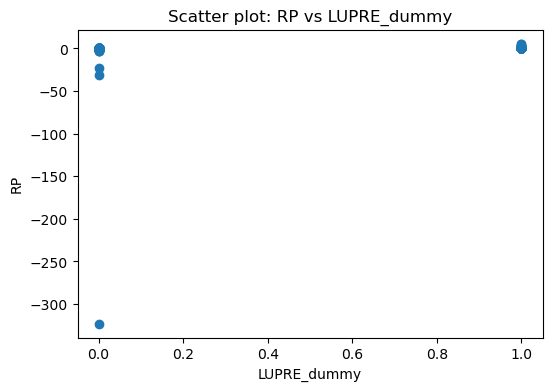

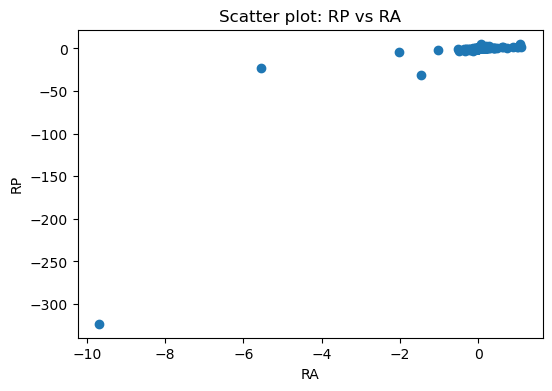

In [17]:
import matplotlib.pyplot as plt

# Define the target variable
target = 'RP'

# Get the predictor variables from the final model
final_predictors = result.model.exog_names[1:]  # Exclude the intercept

# For each predictor in the final model, plot a scatter plot with the target variable
for predictor in final_predictors:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[predictor], df[target])
    plt.xlabel(predictor)
    plt.ylabel(target)
    plt.title(f'Scatter plot: {target} vs {predictor}')
    plt.show()

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Fit the model on the training set
model = smf.ols(formula=f"{target} ~ {predictors[0]}", data=df_train)
result = model.fit()

# Iterate over the remaining predictors
for predictor in predictors[1:]:
    model = smf.ols(formula=f"{target} ~ {predictor} + {result.model.exog_names[1]}", data=df_train)
    new_result = model.fit()

    # If the new predictor is statistically significant (p-value < 0.05), add it to the model
    if new_result.pvalues[predictor] < 0.05:
        result = new_result

# Validate the model on the testing set
y_test = df_test[target]
y_pred = result.predict(df_test)

# Calculate the R-squared value for the testing set
r_squared_test = 1 - ((y_test - y_pred) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

# Interpret the R-squared value
if r_squared_test > 0.7:
    interpretation = "The model explains a large portion of the variability in the target variable. It's a good fit for the data."
elif r_squared_test > 0.5:
    interpretation = "The model explains a moderate portion of the variability in the target variable. It's a reasonably good fit for the data."
elif r_squared_test > 0.3:
    interpretation = "The model explains a small portion of the variability in the target variable. It may not be a good fit for the data."
else:
    interpretation = "The model explains very little of the variability in the target variable. It's not a good fit for the data."

print(f"R-squared for the testing set: {r_squared_test}")
print(interpretation)

R-squared for the testing set: 0.47508484546253604
The model explains a small portion of the variability in the target variable. It may not be a good fit for the data.
